In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

from numpy import random
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [11]:
def get_data(path):
    data = load_svmlight_file(path)
    return data[0], data[1]

def Loss(X,W,y,lambdal):
    Loss = np.sum(np.log(1 + np.exp(-y * np.dot(X,W)))) / X.shape[0] + lambdal / 2 * np.dot(W,W.T)
    return Loss

def Gradient(X,W,y,lambdal):
    Gradient = np.dot(((-y)/ (1+ np.exp(y * np.dot(X,W)))),X ) / X.shape[0] + W * lambdal
    return Gradient

def get_batch(runs, X_random, y_random, batch_size, shape):
    if l == runs - 1:
        X_batch = X_random[l * batch_size:shape + 1]
        y_batch = y_random[l * batch_size:shape + 1]
    else:
        X_batch = X_random[l * batch_size:(l + 1) * batch_size]
        y_batch = y_random[l * batch_size:(l + 1) * batch_size]
    return X_batch,y_batch


In [24]:
train_file_path = './a9a.txt'
validation_file_path = './a9a.t'

X_train, y_train = get_data(train_file_path)
X_validation, y_validation = get_data(validation_file_path)

X_train = X_train.toarray()
X_validation = X_validation.toarray()


col = np.zeros(( X_validation.shape[0]))
col_train = np.ones(( X_train.shape[0]))
col_validation = np.ones(( X_validation.shape[0]))

X_validation = np.column_stack((X_validation,col))
X_train = np.column_stack((X_train,col_train))
X_validation = np.column_stack((X_validation,col_validation))

N = X_train.shape[1]

learning_rate = 0.02
iter_i = 5
batch_size = 128
iter_j = math.ceil(X_train.shape[0] / float(batch_size))
max_iteration = iter_i * iter_j
random_list = np.arange(X_train.shape[0])
lambdal = 0.005
gamma = 0.9
epsilon = np.e**(-8)

In [25]:
W = np.random.normal(size=N)
Loss_train_NAG = np.zeros(max_iteration)
Loss_validation_NAG = np.zeros(max_iteration)
v_t = np.zeros(N)
for j in range(iter_i):
    np.random.shuffle(random_list)
    X_random = X_train[random_list]
    y_random = y_train[random_list]
    for l in range(iter_j):
        X_batch,y_batch = get_batch(iter_j, X_random, y_random, batch_size, X_train.shape[0])
        W_t = W - v_t * gamma
        Loss_train_NAG[j * iter_j + l] = Loss(X_batch , W,y_batch,lambdal)
        Loss_validation_NAG[j * iter_j + l] = Loss(X_validation,W,y_validation,lambdal) 
        Gradient_1 = Gradient(X_batch,W_t,y_batch,lambdal)
        v_t = v_t * gamma + Gradient_1 * learning_rate
        W = W - v_t

In [26]:
W = np.random.normal(size=N)
Loss_train_RMSprop = np.zeros(max_iteration)
Loss_validation_RMSprop = np.zeros(max_iteration)
Gradient_2 = 0
for j in range(iter_i):
    np.random.shuffle(random_list)
    X_random = X_train[random_list]
    y_random = y_train[random_list]
    for l in range(iter_j):
        X_batch,y_batch = get_batch(iter_j,X_random,y_random,batch_size,X_train.shape[0])
        Loss_train_RMSprop[j*iter_j+l] = Loss(X_batch,W,y_batch,lambdal)
        Gradient_1 = Gradient(X_batch,W,y_batch,lambdal)
        Loss_validation_RMSprop[j*iter_j+l] = Loss(X_validation,W,y_validation,lambdal)
        Gradient_2 = Gradient_2 * 0.9 + np.dot(Gradient_1,Gradient_1.T) * 0.1
        W = W - Gradient_1 *(learning_rate / math.sqrt(Gradient_2 + epsilon))

In [27]:
W = np.random.normal(size=N)
Loss_train_AdaDelta = np.zeros(max_iteration)
Loss_validation_AdaDelta = np.zeros(max_iteration)
Gradient_2 = 0
W_2 = 0
RMS_g = 0
RMS_W = 0
W_delta = np.zeros(N)
for j in range(iter_i):
    np.random.shuffle(random_list)
    X_random = X_train[random_list]
    y_random = y_train[random_list]
    for l in range(iter_j):
        X_batch,y_batch = get_batch(iter_j,X_random,y_random,batch_size,X_train.shape[0])
        Loss_train_AdaDelta[j*iter_j+l] = Loss(X_batch,W,y_batch,lambdal)
        Gradient_1 = Gradient(X_batch,W,y_batch,lambdal)
        Loss_validation_AdaDelta[j*iter_j+l] = Loss(X_validation,W,y_validation,lambdal)
        Gradient_2 = Gradient_2 * gamma + np.dot(Gradient_1, Gradient_1.T) * (1 - gamma)
        RMS_g = math.sqrt(Gradient_2 + epsilon)
        W = W - Gradient_1 *(RMS_W / RMS_g)
        W_delta = Gradient_1 *(- learning_rate / RMS_g)
        W_2 = W_2 * gamma + np.dot(W_delta, W_delta.T) * (1 - gamma)
        RMS_W = math.sqrt(W_2 + epsilon)

In [28]:
beta1 = 0.9
beta2 =0.999 
W = np.random.normal(size=N)
Loss_train_Adam = np.zeros(max_iteration)
Loss_validation_Adam = np.zeros(max_iteration)
m_t = np.zeros(N)
n_t = 0
for j in range(iter_i):
    np.random.shuffle(random_list)
    X_random = X_train[random_list]
    y_random = y_train[random_list]
    for l in range(iter_j):
        X_batch,y_batch = get_batch(iter_j,X_random,y_random,batch_size,X_train.shape[0])
        Loss_train_Adam[j*iter_j+l] = Loss(X_batch,W,y_batch,lambdal)
        Gradient_1 = Gradient(X_batch,W,y_batch,lambdal)
        Loss_validation_Adam[j*iter_j+l] = Loss(X_validation,W,y_validation,lambdal)
        m_t = m_t * beta1 + Gradient_1 * (1-beta1)
        n_t = n_t * beta2 + np.dot(Gradient_1, Gradient_1.T) * (1-beta2)
        hat_m = m_t * (1 / (1-beta1))
        hat_n = n_t * (1 / (1-beta2))
        W = W - hat_m * (learning_rate / (math.sqrt(hat_n)+epsilon))

NAG:


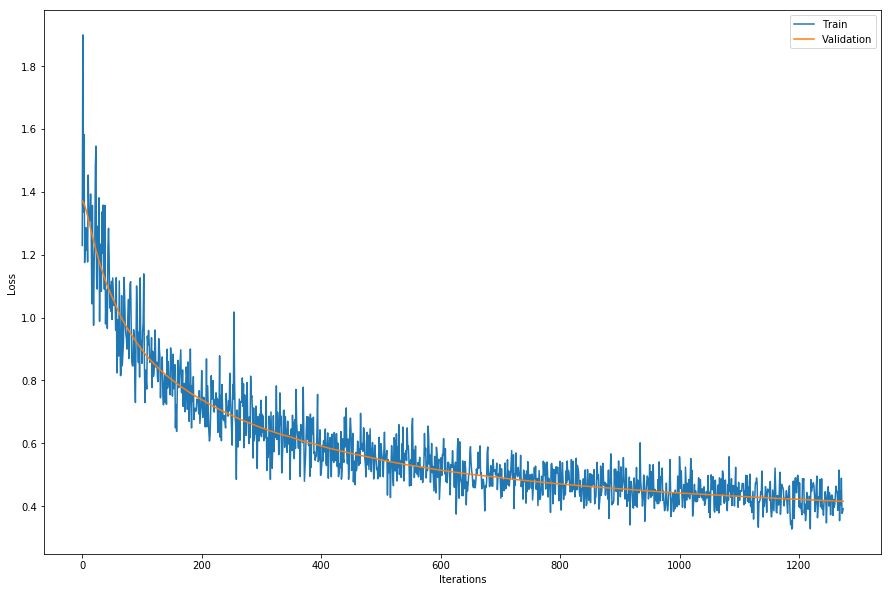

In [29]:
print('NAG:')
plt.figure(figsize=(15, 10))
ax = plt.subplot()            
line_train = ax.plot(Loss_train_NAG, label='Train')
line_validate = ax.plot(Loss_validation_NAG, label='Validation')
ax.set(xlabel='Iterations', ylabel='Loss')
plt.legend()
plt.show()

RMSprop:


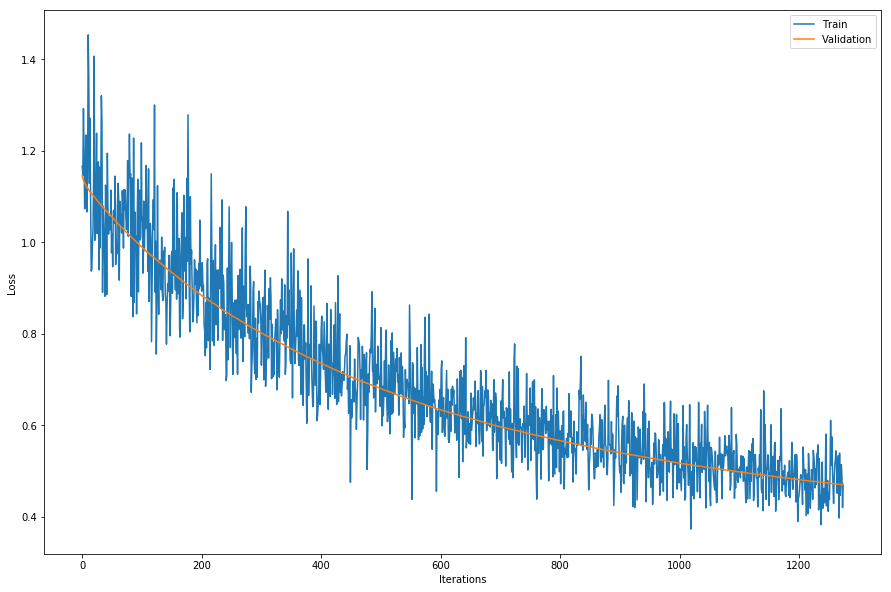

In [30]:
print('RMSprop:')
plt.figure(figsize=(15, 10))
ax = plt.subplot()            
line_train = ax.plot(Loss_train_RMSprop, label='Train')
line_validate = ax.plot(Loss_validation_RMSprop, label='Validation')
ax.set(xlabel='Iterations', ylabel='Loss')
plt.legend()
plt.show()

AdaDelta:


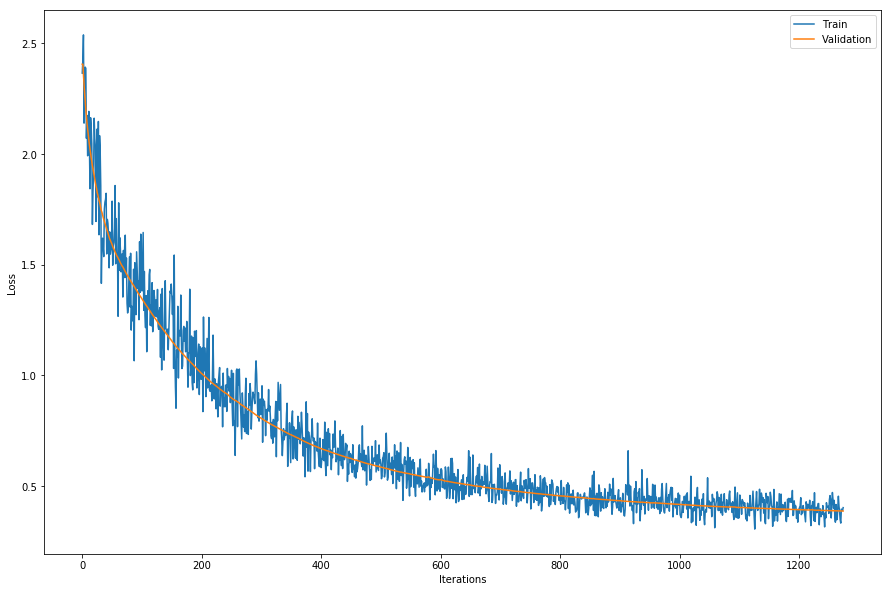

In [31]:
print('AdaDelta:')
plt.figure(figsize=(15, 10))
ax = plt.subplot()            
line_train = ax.plot(Loss_train_AdaDelta, label='Train')
line_validate = ax.plot(Loss_validation_AdaDelta, label='Validation')
ax.set(xlabel='Iterations', ylabel='Loss')
plt.legend()
plt.show()


Adam


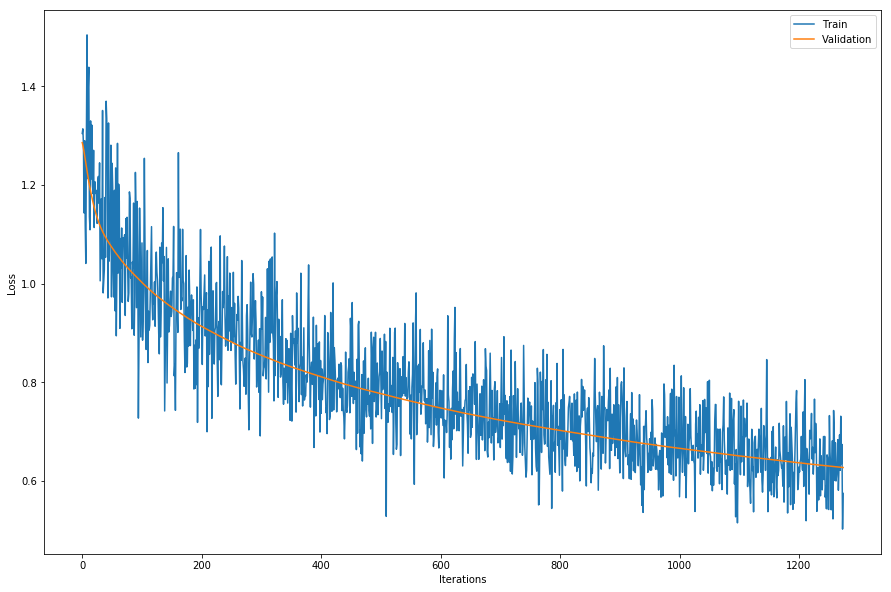

In [32]:
print('Adam')
plt.figure(figsize=(15, 10))
ax = plt.subplot()            
line_train = ax.plot(Loss_train_Adam, label='Train')
line_validate = ax.plot(Loss_validation_Adam, label='Validation')
ax.set(xlabel='Iterations', ylabel='Loss')
plt.legend()
plt.show()

ALL:


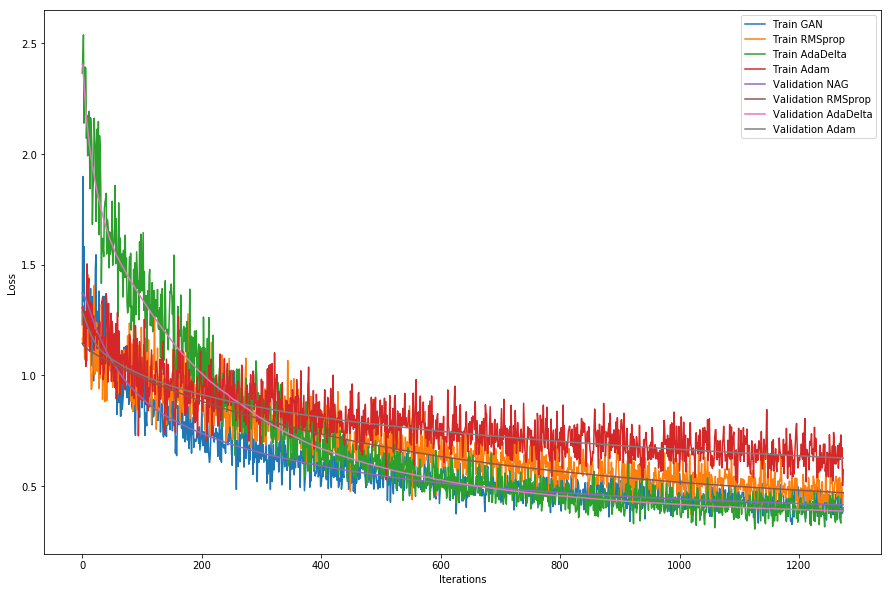

In [33]:
print('ALL:')
plt.figure(figsize=(15, 10))
ax = plt.subplot()            
line_train = ax.plot(Loss_train_NAG, label='Train GAN')
line_train_RMSprop = ax.plot(Loss_train_RMSprop, label='Train RMSprop')
line_train_AdaDelta = ax.plot(Loss_train_AdaDelta, label='Train AdaDelta')
line_train_Adam = ax.plot(Loss_train_Adam, label='Train Adam')
line_validate_NAG = ax.plot(Loss_validation_NAG, label='Validation NAG')
line_validate_RMSprop = ax.plot(Loss_validation_RMSprop, label='Validation RMSprop')
line_validate_AdaDelta = ax.plot(Loss_validation_AdaDelta, label='Validation AdaDelta')
line_validate_Adam = ax.plot(Loss_validation_Adam, label='Validation Adam')
ax.set(xlabel='Iterations', ylabel='Loss')
plt.legend()
plt.show()